In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
df
# We have 212331 rows, 15 columns
df.shape
# (212331, 15)
df.head()
df.info()
# 13 of the columns are object data types (strings) and 2 of them are int64 ['Year', 'Total Tested']
df.isnull().sum()
# I noticed that the info method shows that there are no Null values, but we can see that our two features ["Number Scoring CR", "Percent Scoring CR"] are "na", but are read as objects.
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


In [3]:
df.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [4]:
df['Mean Score'] =pd.to_numeric(df['Mean Score'], errors='coerce')
df['Mean Score'].dtype
# In order to change Mean Score data type to numeric

dtype('float64')

In [5]:
df_subset=df[["School DBN","School Name","Regents Exam","Year","Total Tested","Mean Score"]]
# still 212331 rows, including Null rows
df_subset.dropna(inplace=True)
# 137101 rows after droppin Null rows
df_subset.info()
# Ensure all features are of correct data types!

<class 'pandas.core.frame.DataFrame'>
Index: 137101 entries, 1 to 212325
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   School DBN    137101 non-null  object 
 1   School Name   137101 non-null  object 
 2   Regents Exam  137101 non-null  object 
 3   Year          137101 non-null  int64  
 4   Total Tested  137101 non-null  int64  
 5   Mean Score    137101 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.3+ MB


<ipython-input-5-8d039d33c5ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace=True)


In [6]:
df_subset
# 137101 rows × 6 columns
df_subset.nunique()
# There are 965 unique schools

,0
School DBN,971
School Name,965
Regents Exam,14
Year,3
Total Tested,1118
Mean Score,747


In [7]:
school_names=df_subset.groupby("School Name")["School Name"].count()
school_names

,School Name
School Name,
47 The American Sign Language and English Secondar,207
A. Philip Randolph Campus High School,367
ACORN Community High School,197
Abraham Lincoln High School,407
Abraham Lincoln Yabc,156
...,...
Young Women's Leadership School,246
Young Women's Leadership School of Brooklyn,195
Young Women's Leadership School of the Bronx,84


In [ ]:
df_subset.describe()
df['Year'].unique()

array([2017, 2015, 2016])

- There are 965 different schools that participated in the regents exams from year 2015-2017.

- Out of that, Abraham Lincoln High School has 407 records. Second most is A.
 Philip Randolph Campus High School with 367 records.





In [9]:
school_1=df_subset[df_subset["School Name"]=="Abraham Lincoln High School"]
school_1

,School DBN,School Name,Regents Exam,Year,Total Tested,Mean Score
12515,21K410,Abraham Lincoln High School,Algebra2/Trigonometry,2015,130,72.7
12516,21K410,Abraham Lincoln High School,Algebra2/Trigonometry,2016,142,70.5
12518,21K410,Abraham Lincoln High School,Common Core Algebra,2015,528,56.8
12519,21K410,Abraham Lincoln High School,Common Core Algebra,2016,1041,62.7
12520,21K410,Abraham Lincoln High School,Common Core Algebra,2017,861,67.2
...,...,...,...,...,...,...
186031,21K410,Abraham Lincoln High School,U.S. History and Government,2016,6,59.8
186032,21K410,Abraham Lincoln High School,U.S. History and Government,2016,121,61.4
186034,21K410,Abraham Lincoln High School,U.S. History and Government,2017,75,59.7
186035,21K410,Abraham Lincoln High School,U.S. History and Government,2017,53,60.4


In [8]:
school_2=df_subset[df_subset["School Name"]=="A. Philip Randolph Campus High School"]
school_2

,School DBN,School Name,Regents Exam,Year,Total Tested,Mean Score
3849,06M540,A. Philip Randolph Campus High School,Algebra2/Trigonometry,2015,123,59.1
3850,06M540,A. Philip Randolph Campus High School,Algebra2/Trigonometry,2016,172,55.5
3851,06M540,A. Philip Randolph Campus High School,Algebra2/Trigonometry,2017,51,46.1
3852,06M540,A. Philip Randolph Campus High School,Common Core Algebra,2015,162,62.2
3853,06M540,A. Philip Randolph Campus High School,Common Core Algebra,2016,286,72.7
...,...,...,...,...,...,...
155176,06M540,A. Philip Randolph Campus High School,U.S. History and Government,2017,14,78.4
155177,06M540,A. Philip Randolph Campus High School,U.S. History and Government,2017,82,69.3
155178,06M540,A. Philip Randolph Campus High School,U.S. History and Government,2017,160,71.7
155179,06M540,A. Philip Randolph Campus High School,U.S. History and Government,2017,8,78.5


In [ ]:
# Descriptive stats of the mean score of Abraham Lincoln High School.
school_1['Mean Score'].describe()

,Mean Score
count,407.000000
mean,61.620147
std,7.334290
min,39.000000
25%,56.600000
50%,61.900000
75%,66.150000
max,82.300000


In [18]:
# Descriptive stats for all other schools, except Abraham Lincoln High School
other_schools = df_subset[df_subset["School Name"] != "Abraham Lincoln High School"]["Mean Score"]
other_schools.describe()

,Mean Score
count,136694.000000
mean,66.012597
std,11.296128
min,15.000000
25%,58.300000
50%,65.500000
75%,73.400000
max,98.700000


Compared to other schools, Abraham Lincoln High School has a lower mean of mean of score 61.6 compared to 66.
It also has a std of 7.3 compared to 11.3 for all other schools.

<Axes: >

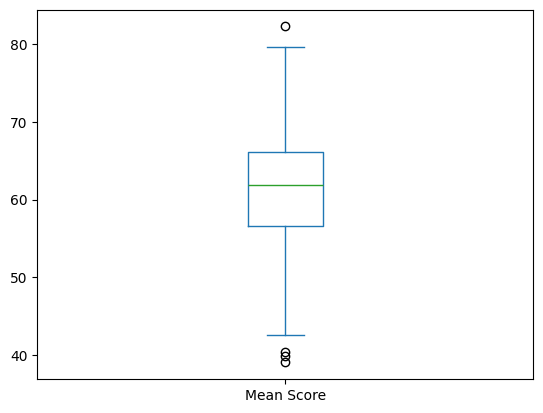

In [12]:
school_1["Mean Score"].plot(kind="box")

<Axes: >

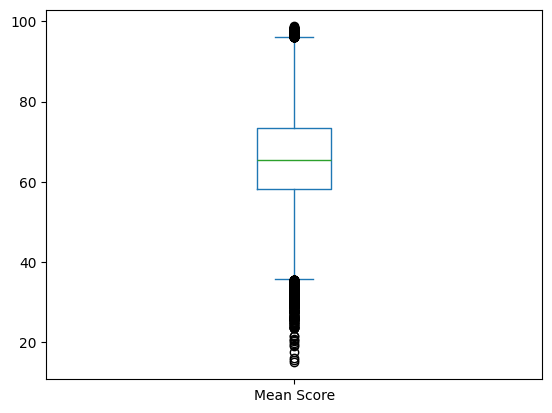

In [19]:
other_schools.plot(kind="box")

<ipython-input-27-57d20bbf66e3>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([school_1_scores, other_schools_scores], labels=["Abraham Lincoln HS", "Other Schools"])


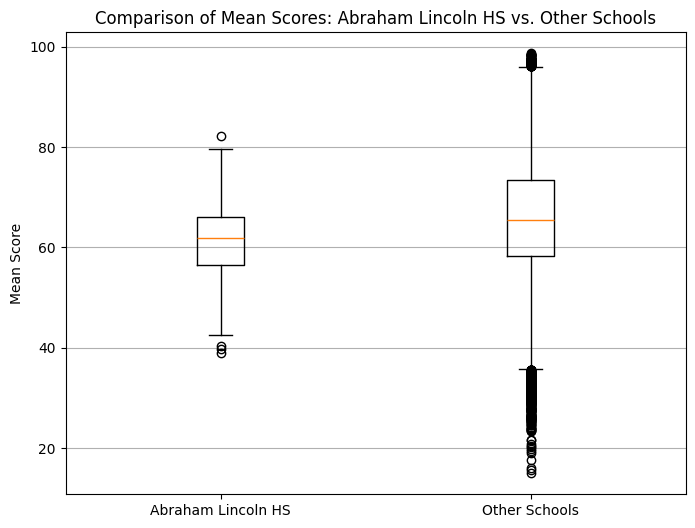

In [27]:
# Create a boxplot for both groups
school_1_scores = df_subset[df_subset["School Name"] == "Abraham Lincoln High School"]["Mean Score"].dropna().tolist()
other_schools_scores = df_subset[df_subset["School Name"] != "Abraham Lincoln High School"]["Mean Score"].dropna().tolist()

# Create a side-by-side boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([school_1_scores, other_schools_scores], labels=["Abraham Lincoln HS", "Other Schools"])

# Formatting
plt.title("Comparison of Mean Scores: Abraham Lincoln HS vs. Other Schools")
plt.ylabel("Mean Score")
plt.grid(axis="y")

# Show the plot
plt.show()

We can conclude that Abraham Lincoln High School has a lower median mean score compared to other schools, indicating slightly weaker performance. However, its scores are more consistent, with fewer extreme outliers. Other schools show a wider range of scores, including both higher top scores and more low-scoring outliers.